# Project Title:**AtliQ Grand Hospitality Analysis**
### Project submission by: **Nilesh Gaddapawar**

A **Data Analyst Intern** at **Unified Mentor Private Limited**
- Technologies: Data Science
- Domain: Travel and Tourism
- Project Difficulties level:Advanced

**Problem Statement:**



---


Atliq Grands owns multiple five-star hotels across India. They have been in the hospitality
industry for the past 20 years. Due to strategic moves from other competitors and ineffective
decision-making in management, Atliq Grands are losing its market share and revenue in the
luxury/business hotels category. As a strategic move, the managing director of Atliq Grands
wanted to incorporate “Business and Data Intelligence” in order to regain their market share
and revenue.
However, they do not have an in-house data analytics team to provide them with these
insights. Their revenue management team had decided to hire a 3rd party service provider to
provide them with insights from their historical data.

---



- **To import the pandas library and assign it the alias 'pd' for convenience.** (*Pandas is a powerful library for data manipulation and analysis*)

In [ ]:
import pandas as pd

- **To import the numpy library and assign it the alias 'np' for convenience.** (*NumPy is a library for efficient numerical computation*)

In [ ]:
import numpy as np

- **To import the matplotlib.pyplot module and assign it the alias 'plt' for convenience.**(*Matplotlib is a popular library for creating static, animated, and interactive visualizations*)

In [ ]:
import matplotlib.pyplot as plt

- **To import the seaborn library and assign it the alias 'sns' for convenience**. (*Seaborn is a visualization library built on top of Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics*)

In [ ]:
import seaborn as sns

- **To load data from CSV files into pandas DataFrames**

In [ ]:
df_bookings = pd.read_csv('fact_bookings.csv')
df_date = pd.read_csv('dim_date.csv')
df_hotels = pd.read_csv('dim_hotels.csv')
df_rooms = pd.read_csv('dim_rooms.csv')
df_agg_bookings = pd.read_csv('fact_aggregated_bookings.csv')

- **To import the warnings module, which allows us to manage warning messages**

In [ ]:
import warnings

# Ignore all warnings within this block
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

## **Basic Data Exploration**

- **Display the first 6 rows of the 'df_bookings' DataFrame**. (*The `head()` function returns the first n rows (default is 5) of a DataFrame. In this case, we're displaying the first 6 rows*.)

In [ ]:
df_bookings.head(6)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4.0,Checked Out,9100,9100


- **Get the shape of the 'df_bookings' DataFrame, returning a tuple representing the number of rows and columns**

In [ ]:
df_bookings.shape

(134590, 12)

- **To get the unique values in the 'room_category' column of the 'df_bookings' DataFrame**(*The unique() function returns an array of distinct values, helping identify categories, understand value distribution, and prepare data for analysis*).

In [ ]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

- **To get unique booking platforms in the 'df_bookings' DataFrame**

In [ ]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

- **To count the number of bookings by each unique booking platform in the 'df_bookings' DataFrame**

In [ ]:
df_bookings.booking_platform.value_counts()

,count
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


- **Count the number of bookings by each unique booking platform and plot a bar chart**. (*It Visualizes the count of bookings by platform as a bar chart which will Helps to quickly identify the most popular booking channels and trends in booking behavior*)

<Axes: xlabel='booking_platform'>

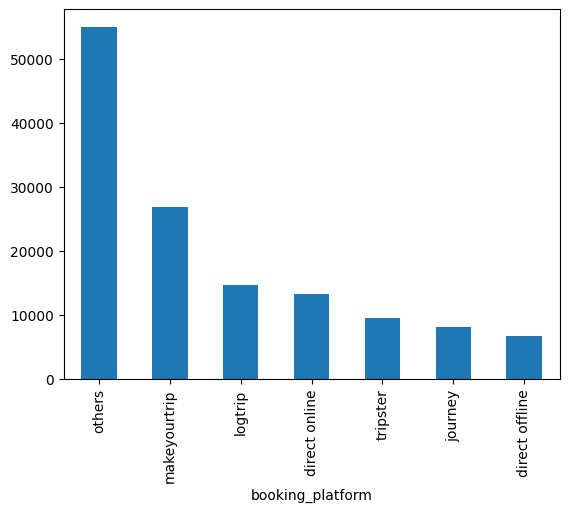

In [ ]:
df_bookings.booking_platform.value_counts().plot(kind='bar')

- **To generate descriptive statistics for all columns in the 'df_bookings' DataFrame**. (It will returns a summary of central tendency, dispersion, and shape for all columns (numeric and non-numeric)and provides insights into data distribution, outliers, and potential data quality issues)

In [ ]:
df_bookings.describe(include= 'all')

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
count,134590,134590.000000,134590,134590,134590,134590.000000,134590,134590,56683.000000,134590,134590.000000,134590.000000
unique,134590,NaN,116,92,97,NaN,4,7,NaN,3,NaN,NaN
top,May012216558RT11,NaN,2022-06-08,2022-07-16,2022-05-09,NaN,RT2,others,NaN,Checked Out,NaN,NaN
freq,1,NaN,1670,2017,1840,NaN,49505,55066,NaN,94411,NaN,NaN
mean,NaN,18061.113493,NaN,NaN,NaN,2.036808,NaN,NaN,3.619004,NaN,14916.013188,12696.123256
std,NaN,1093.055847,NaN,NaN,NaN,1.031766,NaN,NaN,1.235009,NaN,6452.868072,6928.108124
min,NaN,16558.000000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,6500.000000,2600.000000
25%,NaN,17558.000000,NaN,NaN,NaN,1.000000,NaN,NaN,3.000000,NaN,9900.000000,7600.000000
50%,NaN,17564.000000,NaN,NaN,NaN,2.000000,NaN,NaN,4.000000,NaN,13500.000000,11700.000000
75%,NaN,18563.000000,NaN,NaN,NaN,2.000000,NaN,NaN,5.000000,NaN,18000.000000,15300.000000


- **To find the minimum and maximum revenue generated in the 'df_bookings' DataFrame**. (*These values can help to identify the lowest and highest revenue bookings, Potential outliers or anomalies in revenue data, the range of revenue values for further analysis or filtering*)

In [ ]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 45220)

- **To display the first few rows of the 'df_date' DataFrame**. (*This shows the first 5 rows (by default) of the DataFrame, allowing you to quickly inspect the contents and structure of the data*).

In [ ]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


- **Display the first few rows of the 'df_hotels' DataFrame**

In [ ]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


- **To count the number of hotels by category in the 'df_hotels' DataFrame** (*It will returns a Series with the count of hotels for each category and helps to understand the distribution of hotels across different categories*)

In [ ]:
df_hotels.category.value_counts()

,count
category,
Luxury,16
Business,9


- **To count the number of hotels by city and sort in descending order** (*It will returns a Series with the count of hotels for each city, sorted by count in descending order and helps to identify the cities with the most hotels and understand the distribution of hotels across cities*)

In [ ]:
df_hotels.city.value_counts().sort_values(ascending=False) ## Default it will go by Ascending order)

,count
city,
Mumbai,8
Hyderabad,6
Bangalore,6
Delhi,5


- **To count the number of hotels by city, sort in descending order, and plot a bar chart** (*It will visualizes the count of hotels for each city as a bar chart, with cities on the x-axis and count on the y-axisand helps to quickly identify the cities with the most hotels and understand the distribution of hotels across cities*)

<Axes: xlabel='city'>

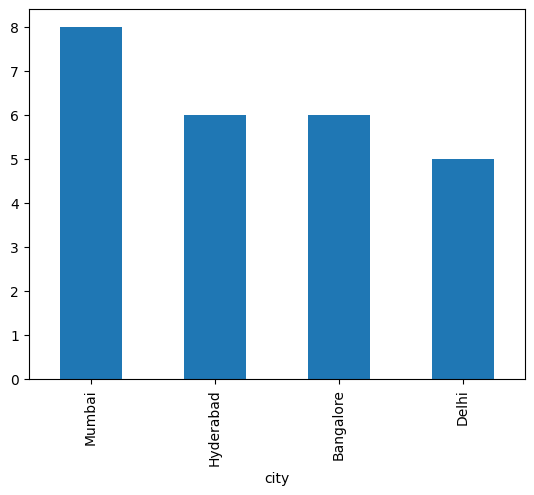

In [ ]:
df_hotels.city.value_counts().sort_values(ascending=False).plot(kind = 'bar')

- **To display the first few rows of the 'df_rooms' DataFrame.** (*This shows the first 5 rows (by default) of the DataFrame, allowing you to quickly inspect the contents and structure of the room data.*)

In [ ]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


- **To display the first few rows of the 'df_agg_bookings' DataFrame** (*This shows the first 5 rows (by default) of the DataFrame, allowing you to quickly inspect the contents and structure of the aggregated booking data.*)

In [ ]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


**1. Find out unique property ids in aggregate bookings dataset**

- **To get the unique property IDs in the 'df_agg_bookings' DataFrame** (*It will returns an array of unique property IDs, helping to identify the distinct properties in the aggregated booking data, understand the scope of properties included in the aggregation and filter or group data by specific property IDs*)

In [ ]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

**2. Find out total bookings per property_id**

- **Count the number of occurrences of each property ID in the 'df_agg_bookings' DataFrame**
  (*It will returns a Series with the count of each property ID, helping to identify the most frequently booked properties, understand the distribution of bookings across properties and inform decisions related to property management or marketing.*)

In [ ]:
df_agg_bookings.property_id.value_counts()

,count
property_id,
16559,368
17559,368
17564,368
19561,368
19559,368
18563,368
18562,368
18561,368
18559,368


**3. Find out days on which bookings are greater than capacity**

In [ ]:
# All three lines of code are accessing the 'capacity' column in the df_agg_bookings DataFrame.
# The output will be the same for each:
df_agg_bookings.loc[:,'capacity']     # This uses the .loc indexer to access the 'capacity' column.
                                      # The : before the comma indicates all rows, and 'capacity' specifies the column.
df_agg_bookings.capacity              # This uses attribute access to get the 'capacity' column.
                                      # This is a convenient shortcut when the column name is a valid Python identifier.
df_agg_bookings['capacity']           # This uses dictionary-like access to get the 'capacity' column.
                                      # This is useful when the column name is not a valid Python identifier or contains spaces.

,capacity
0,30
1,30
2,30
3,19
4,19
...,...
9195,18
9196,18
9197,6
9198,6


In [ ]:
# Filter the DataFrame to find days where bookings exceed capacity
exceeding_capacity = df_agg_bookings[df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity']]

# To display the resulting DataFrame
print(exceeding_capacity)

Empty DataFrame
Columns: [property_id, check_in_date, room_category, successful_bookings, capacity]
Index: []


**4. Find out properties that have highest capacity**

In [ ]:
df_agg_bookings.loc[:,'capacity'].max()
# It will returns the highest capacity value, helping to:
# identify the property with the largest capacity,
# understand the maximum accommodation limit and
# inform decisions related to resource allocation or property development

50

In [ ]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


In [ ]:
p = df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()] [['property_id','capacity','room_category']]
p
# This shows the properties with the highest capacity, along with their room categories

,property_id,capacity,room_category
27,17558,50,RT2
128,17558,50,RT2
229,17558,50,RT2
328,17558,50,RT2
428,17558,50,RT2
...,...,...,...
8728,17558,50,RT2
8828,17558,50,RT2
8928,17558,50,RT2
9028,17558,50,RT2


In [ ]:
p.room_category.unique()

array(['RT2'], dtype=object)

***
### **2. Data Cleaning**
***

In [ ]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


### Removing the data from data frame with negative guests

In [ ]:
df_bookings[df_bookings.no_guests<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [ ]:
### Removing the data from data frame with negative guests

df_bookings = df_bookings[df_bookings.no_guests>0]

df_bookings
# This creates a boolean mask that selects only the rows where the 'guests' column is
# greater than or equal to 0.

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


### Outlier removal in revenue generated*

*This code uses the describe() method to generate descriptive statistics for the revenue_generated column in the df_bookings DataFrame. The output provides a comprehensive summary of the revenue data, helping you understand its distribution, central tendency, and variability.*

In [ ]:
df_bookings.revenue_generated.describe()

,revenue_generated
count,134590.000000
mean,14916.013188
std,6452.868072
min,6500.000000
25%,9900.000000
50%,13500.000000
75%,18000.000000
max,45220.000000


In [ ]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max(),df_bookings.revenue_generated.mean()

(6500, 45220, 14916.013188201203)

*By examining these statistics, you can gain insights into the range and distribution of revenue values, helping to inform business decisions or identify areas for further analysis.*

In [ ]:
lower_limit = df_bookings.revenue_generated.mean() - 3*df_bookings.revenue_generated.std()
lower_limit

-4442.591027103368

This code calculates the lower limit of typical revenue values by subtracting three times the standard deviation (3σ) from the mean revenue. This is based on the 68-95-99.7 rule, which states that in a normal distribution:
- 68% of values fall within 1σ of the mean
- 95% of values fall within 2σ of the mean
- 99.7% of values fall within 3σ of the mean

By using 3σ, you're effectively capturing the vast majority of normal revenue values, and any values below this limit can be considered potential outliers or anomalies.

In [ ]:
higher_limit = df_bookings.revenue_generated.mean() + 3*df_bookings.revenue_generated.std()
higher_limit

34274.61740350578

By using the higher and lower limits (calculated earlier) together, you can:
- Identify revenue values that fall within the typical range (between the lower and higher limits)
- Detect potential outliers or anomalies (values outside this range)
- Inform data-driven decisions related to revenue management, growth, or targets

In [ ]:
df_bookings[df_bookings.revenue_generated > higher_limit]
# Identifies exceptionally high-revenue bookings, helping to:
# - Analyze characteristics of these bookings
# - Inform strategies to replicate or build upon them

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,2022-04-27,2022-05-01,2022-05-07,4,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,2022-04-28,2022-05-01,2022-05-03,3,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,2022-04-24,2022-05-01,2022-05-07,5,RT4,logtrip,NaN,Checked Out,41990,41990
153,May012216559RT417,16559,2022-04-30,2022-05-01,2022-05-02,4,RT4,others,NaN,Cancelled,38760,15504
...,...,...,...,...,...,...,...,...,...,...,...,...
134467,Jul312219562RT45,19562,2022-07-28,2022-07-31,2022-08-01,6,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134469,Jul312219562RT47,19562,2022-07-10,2022-07-31,2022-08-06,5,RT4,makeyourtrip,NaN,Cancelled,37050,14820
134474,Jul312219562RT412,19562,2022-07-25,2022-07-31,2022-08-06,5,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,2022-07-31,2022-07-31,2022-08-01,4,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [ ]:
df_bookings = df_bookings[df_bookings.revenue_generated < higher_limit]

df_bookings
# This can help with:
# Reducing the impact of outliers on statistical analysis
# Improving model performance by training on more representative data
# Focusing on the characteristics of typical bookings.

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-08-01,2,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


**(2) Outlier removal in revenue generated**

In [ ]:
df_bookings.revenue_realized.describe()
# This code generates descriptive statistics for the revenue_realized column in the df_bookings DataFrame,
# providing insights into the distribution of revenue realized values.

,revenue_realized
count,133070.000000
mean,12468.775464
std,6537.748605
min,2600.000000
25%,7600.000000
50%,11400.000000
75%,15300.000000
max,34200.000000


In [ ]:
lower_limit = df_bookings.revenue_realized.mean() - 3*df_bookings.revenue_realized.std()
lower_limit
# This code calculates the lower limit of typical revenue_realized values by
# subtracting three times the standard deviation (3σ) from the mean revenue_realized.
# This creates a lower bound for normal revenue_realized values, and
# any values below this limit can be considered potential outliers or exceptionally low revenue_realized performances.

-7144.470351902502

In [ ]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit
# This code calculates the higher limit of typical revenue_realized values by
# adding three times the standard deviation (3σ) to the mean revenue_realized.
# This creates an upper bound for normal revenue_realized values, and
# any values above this limit can be considered potential outliers or exceptionally high revenue_realized performances.

32082.021279985467

In [ ]:
df_bookings[df_bookings.revenue_realized>higher_limit].shape
# Returns the number of rows (bookings) and columns in the resulting DataFrame
# Represents the count of outliers or exceptionally high-revenue bookings
# This code filters the df_bookings DataFrame to include only rows where revenue_realized exceeds the higher_limit, and
# returns the shape of the resulting DataFrame, indicating the number of outlier bookings.

(3256, 12)

In [ ]:
df_bookings[df_bookings.revenue_realized>higher_limit]
# Displays the rows (bookings) where revenue_realized exceeds the higher limit
# Shows the characteristics of exceptionally high-revenue bookings
# This code filters the df_bookings DataFrame to include only rows where revenue_realized exceeds the higher_limit, and
# displays the resulting DataFrame, showing the details of bookings with exceptionally high revenue_realized values.

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
140,May012216559RT44,16559,2022-04-28,2022-05-01,2022-05-05,2,RT4,others,NaN,Checked Out,32300,32300
141,May012216559RT45,16559,2022-04-28,2022-05-01,2022-05-04,2,RT4,others,5.0,Checked Out,32300,32300
144,May012216559RT48,16559,2022-04-26,2022-05-01,2022-05-02,2,RT4,makeyourtrip,5.0,Checked Out,32300,32300
145,May012216559RT49,16559,2022-04-28,2022-05-01,2022-05-03,2,RT4,others,NaN,Checked Out,32300,32300
146,May012216559RT410,16559,2022-04-30,2022-05-01,2022-05-06,2,RT4,logtrip,NaN,No Show,32300,32300
...,...,...,...,...,...,...,...,...,...,...,...,...
134580,Jul312217564RT41,17564,2022-07-31,2022-07-31,2022-08-02,1,RT4,direct online,NaN,Checked Out,32300,32300
134582,Jul312217564RT43,17564,2022-07-31,2022-07-31,2022-08-03,1,RT4,others,1.0,Checked Out,32300,32300
134584,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-08-01,2,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300


In [ ]:
df_bookings[df_bookings.revenue_realized>higher_limit].room_category.value_counts()
# This code filters the df_bookings DataFrame to include only rows where revenue_realized exceeds the higher_limit, and then applies the
# value_counts() method to the room_category column, returning a count of each room category among these exceptionally high-revenue bookings.

,count
room_category,
RT4,3256


In [ ]:
df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.describe()
# provides insights into the distribution of revenue_realized values for room category 'RT4'.

,revenue_realized
count,14553.000000
mean,22483.440390
std,8338.248282
min,7600.000000
25%,19000.000000
50%,22800.000000
75%,31350.000000
max,34200.000000


In [ ]:
lower_limit = 23439.308444 - 3*9048.599076
lower_limit
# This value represents the lower bound of typical revenue_realized values, and
# any values below this limit can be considered potential outliers or exceptionally low revenue_realized performances.

-3706.4887840000047

In [ ]:
Higher_limit = 23439.308444 + 3*9048.599076
Higher_limit
# This value represents the upper bound of typical revenue_realized values, and
# any values above this limit can be considered potential outliers or exceptionally high revenue_realized performances.

50585.105672000005

In [ ]:
df_bookings.isnull().sum()
# This code uses the isnull() method to identify missing values (NaN) in the df_bookings DataFrame and
# then applies the sum() method to count the number of missing values for each column.
# The output will show the total number of missing values for each column, helping you identify columns with missing data.

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,77054
booking_status,0


**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [ ]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [ ]:
M = df_agg_bookings.capacity.mean()
M
# This code calculates the mean (average) value of the capacity column in the df_agg_bookings DataFrame and
# assigns it to the variable M. The result represents the average capacity across all aggregated bookings.

25.28

In [ ]:
df_agg_bookings['capacity'].fillna(25.28,inplace = True)
# This code fills missing values (NaN) in the capacity column of the df_agg_bookings DataFrame with the mean capacity value (25.28).
# The inplace=True argument modifies the original DataFrame, replacing the missing values with the specified value.

In [ ]:
df_agg_bookings['capacity'].isnull().sum()
# This code checks for any remaining missing values (NaN) in the capacity column.
# The output will show the count of remaining NaN values, which should be 0 if all missing values were successfully filled.

0

**-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [ ]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [ ]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <=df_agg_bookings.capacity]

In [ ]:
df_agg_bookings.shape

(9200, 5)

***
### ==> 3. Data Transformation

**Create occupancy percentage column**

In [ ]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [ ]:
df_agg_bookings['occu_per']= round((df_agg_bookings['successful_bookings'] / df_agg_bookings['capacity'])*100,2)

## df_agg_bookings['occu_per'] = df_agg_bookings['occu_per'].apply(lambda x: round(x*100,2))

In [ ]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67
3,17558,01-May-22,RT1,13,19,68.42
4,16558,01-May-22,RT1,18,19,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22
9196,16559,31-Jul-22,RT4,13,18,72.22
9197,17558,31-Jul-22,RT4,3,6,50.00
9198,19563,31-Jul-22,RT4,3,6,50.00


In [ ]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67
3,17558,01-May-22,RT1,13,19,68.42
4,16558,01-May-22,RT1,18,19,94.74


***
### ==> 4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [ ]:
G = df_agg_bookings.groupby('room_category')

In [ ]:
G.occu_per.mean()

,occu_per
room_category,
RT1,57.919022
RT2,58.007948
RT3,58.028213
RT4,59.278722


In [ ]:
df_agg_bookings.groupby('room_category').occu_per.mean()

,occu_per
room_category,
RT1,57.919022
RT2,58.007948
RT3,58.028213
RT4,59.278722


In [ ]:
df_agg_bookings.groupby('room_category') ['occu_per'].mean()

,occu_per
room_category,
RT1,57.919022
RT2,58.007948
RT3,58.028213
RT4,59.278722


In [ ]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
mer = pd.merge(df_agg_bookings,df_rooms,left_on='room_category', right_on='room_id')

In [ ]:
mer

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_id,room_class
0,16559,01-May-22,RT1,25,30,83.33,RT1,Standard
1,19562,01-May-22,RT1,28,30,93.33,RT1,Standard
2,19563,01-May-22,RT1,23,30,76.67,RT1,Standard
3,17558,01-May-22,RT1,13,19,68.42,RT1,Standard
4,16558,01-May-22,RT1,18,19,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6,50.00,RT4,Presidential


In [ ]:
mer.groupby('room_class')['occu_per'].mean().round(2)

,occu_per
room_class,
Elite,58.01
Premium,58.03
Presidential,59.28
Standard,57.92


In [ ]:
mer.drop('room_id',axis = 1,inplace= True) ## Dropped room_id as we have 2 columns with same data

In [ ]:
mer

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class
0,16559,01-May-22,RT1,25,30,83.33,Standard
1,19562,01-May-22,RT1,28,30,93.33,Standard
2,19563,01-May-22,RT1,23,30,76.67,Standard
3,17558,01-May-22,RT1,13,19,68.42,Standard
4,16558,01-May-22,RT1,18,19,94.74,Standard
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22,Presidential
9196,16559,31-Jul-22,RT4,13,18,72.22,Presidential
9197,17558,31-Jul-22,RT4,3,6,50.00,Presidential
9198,19563,31-Jul-22,RT4,3,6,50.00,Presidential


**2. Print average occupancy rate per city**

In [ ]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
merg = pd.merge(mer,df_hotels,on='property_id',how = 'outer')

In [ ]:
merg

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,02-May-22,RT1,20,30,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,03-May-22,RT1,17,30,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,04-May-22,RT1,21,30,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,05-May-22,RT1,16,30,53.33,Standard,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...
9195,18560,27-Jul-22,RT4,6,15,40.00,Presidential,Atliq City,Business,Hyderabad
9196,18560,28-Jul-22,RT4,9,15,60.00,Presidential,Atliq City,Business,Hyderabad
9197,18560,29-Jul-22,RT4,8,15,53.33,Presidential,Atliq City,Business,Hyderabad
9198,18560,30-Jul-22,RT4,9,15,60.00,Presidential,Atliq City,Business,Hyderabad


In [ ]:
merg.groupby('city') ['occu_per'].mean().round(2)

,occu_per
city,
Bangalore,56.34
Delhi,61.52
Hyderabad,58.12
Mumbai,57.92


<Axes: xlabel='city'>

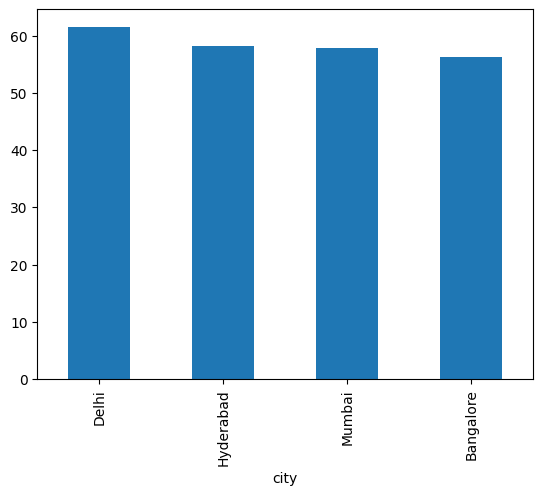

In [ ]:
merg.groupby('city') ['occu_per'].mean().round(2).sort_values(ascending= False).plot(kind = 'bar')

**3. When was the occupancy better? Weekday or Weekend?**

In [ ]:
merg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,02-May-22,RT1,20,30,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,03-May-22,RT1,17,30,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,04-May-22,RT1,21,30,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,05-May-22,RT1,16,30,53.33,Standard,Atliq Exotica,Luxury,Mumbai


In [ ]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [ ]:
merge_df = pd.merge(merg, df_date,left_on = 'check_in_date',right_on = 'date')

In [ ]:
merge_df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
1,16559,01-May-22,RT2,35,41,85.37,Elite,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
2,16559,01-May-22,RT3,27,32,84.38,Premium,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
3,16559,01-May-22,RT4,17,18,94.44,Presidential,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
4,19562,01-May-22,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore,01-May-22,May 22,W 19,weekend


In [ ]:
merge_df.groupby('day_type') ['occu_per'].mean().round(2)

,occu_per
day_type,
weekeday,51.81
weekend,73.96


**4: In the month of June, what is the occupancy for different cities**

In [ ]:
merge_df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
1,16559,01-May-22,RT2,35,41,85.37,Elite,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
2,16559,01-May-22,RT3,27,32,84.38,Premium,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
3,16559,01-May-22,RT4,17,18,94.44,Presidential,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
4,19562,01-May-22,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore,01-May-22,May 22,W 19,weekend


In [ ]:
Jun = merge_df.groupby(['city','mmm yy']) ['occu_per'].mean()
Jun

city       mmm yy
Bangalore  Jul 22    56.066196
           Jun 22    55.846750
           May 22    57.094247
Delhi      Jul 22    61.254645
           Jun 22    61.456367
           May 22    61.851774
Hyderabad  Jul 22    57.648938
           Jun 22    57.688917
           May 22    59.014194
Mumbai     Jul 22    57.503770
           Jun 22    57.789542
           May 22    58.449657
Name: occu_per, dtype: float64

In [ ]:
Jun.loc[Jun.index.get_level_values('mmm yy') =='Jun 22',:]

,,occu_per
city,mmm yy,
Bangalore,Jun 22,55.846750
Delhi,Jun 22,61.456367
Hyderabad,Jun 22,57.688917
Mumbai,Jun 22,57.789542


### Another approach

In [ ]:
 Jun_data = merge_df[merge_df['mmm yy'] == 'Jun 22']

In [ ]:
Jun_data.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city,date,mmm yy,week no,day_type
3100,16559,01-Jun-22,RT1,14,30,46.67,Standard,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3101,16559,01-Jun-22,RT2,21,41,51.22,Elite,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3102,16559,01-Jun-22,RT3,15,32,46.88,Premium,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3103,16559,01-Jun-22,RT4,8,18,44.44,Presidential,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3104,19562,01-Jun-22,RT1,18,30,60.00,Standard,Atliq Bay,Luxury,Bangalore,01-Jun-22,Jun 22,W 23,weekeday


In [ ]:
Jun_data.groupby(['city','mmm yy'])['occu_per'].mean()

,,occu_per
city,mmm yy,
Bangalore,Jun 22,55.846750
Delhi,Jun 22,61.456367
Hyderabad,Jun 22,57.688917
Mumbai,Jun 22,57.789542


**6. Print revenue realized per city**

In [ ]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
rev_realized = pd.merge(df_bookings,df_hotels,on = 'property_id')

In [ ]:
rev_realized.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [ ]:
rev_realized.groupby('city')['revenue_realized'].sum()

,revenue_realized
city,
Bangalore,415122840
Delhi,289472918
Hyderabad,325232870
Mumbai,629391323


**7. Print month by month revenue**

In [ ]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [ ]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [ ]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100


In [ ]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133070 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         133070 non-null  object 
 1   property_id        133070 non-null  int64  
 2   booking_date       133070 non-null  object 
 3   check_in_date      133070 non-null  object 
 4   checkout_date      133070 non-null  object 
 5   no_guests          133070 non-null  int64  
 6   room_category      133070 non-null  object 
 7   booking_platform   133070 non-null  object 
 8   ratings_given      56016 non-null   float64
 9   booking_status     133070 non-null  object 
 10  revenue_generated  133070 non-null  int64  
 11  revenue_realized   133070 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 13.2+ MB


In [ ]:
df_date['date']= pd.to_datetime(df_date['date'])

df_date.head(3)

<ipython-input-106-610dd3e083b3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date']= pd.to_datetime(df_date['date'])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [ ]:

import pandas as pd
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], errors='coerce', infer_datetime_format=True)


<ipython-input-107-f220ab7ade1c>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], errors='coerce', infer_datetime_format=True)
<ipython-input-107-f220ab7ade1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], errors='coerce', infer_datetime_format=True)


In [ ]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100


In [ ]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133070 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         133070 non-null  object        
 1   property_id        133070 non-null  int64         
 2   booking_date       133070 non-null  object        
 3   check_in_date      133070 non-null  datetime64[ns]
 4   checkout_date      133070 non-null  object        
 5   no_guests          133070 non-null  int64         
 6   room_category      133070 non-null  object        
 7   booking_platform   133070 non-null  object        
 8   ratings_given      56016 non-null   float64       
 9   booking_status     133070 non-null  object        
 10  revenue_generated  133070 non-null  int64         
 11  revenue_realized   133070 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 13.2+ MB


In [ ]:
df_bookings_all = pd.merge(df_bookings, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,2022-05-01,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,2022-05-01,May 22,W 19,weekend


In [ ]:
df_bookings_all.groupby('mmm yy')['revenue_realized'].sum()

,revenue_realized
mmm yy,
Jul 22,556460174
Jun 22,537219271
May 22,565540506


<Axes: xlabel='mmm yy'>

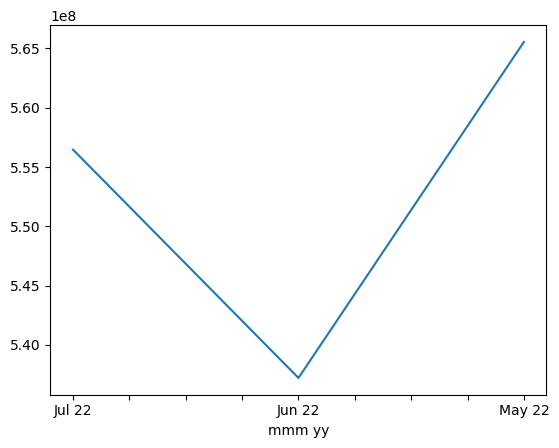

In [ ]:
df_bookings_all.groupby('mmm yy')['revenue_realized'].sum().plot()

**Exercise-1. Print revenue realized per hotel type**

In [ ]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [ ]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100


In [ ]:
hotels_data = pd.merge(df_hotels,df_bookings,on= 'property_id')
hotels_data.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT11,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT13,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100


<Axes: xlabel='property_name'>

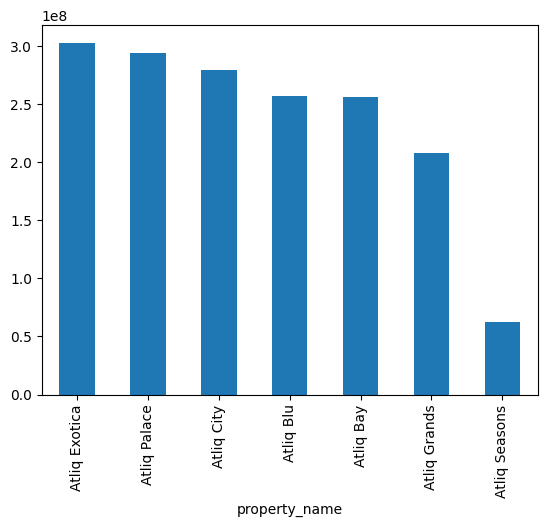

In [ ]:
hotels_data.groupby('property_name')['revenue_realized'].sum().sort_values(ascending = False).plot(kind='bar')

**Exercise-2 Print average rating per city**

In [ ]:
hotels_data.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT11,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT13,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100


In [ ]:
hotels_data.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending = False)

,ratings_given
city,
Delhi,3.78
Hyderabad,3.66
Mumbai,3.65
Bangalore,3.41


<Axes: xlabel='city'>

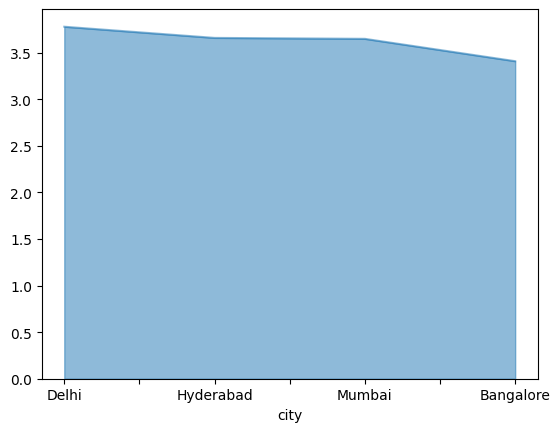

In [ ]:
hotels_data.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending = False).plot(kind='area',stacked = False)

**Exercise-3 Print a pie chart of revenue realized per booking platform**

In [ ]:
hotels_data.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT11,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT13,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100


In [ ]:
hotels_data.groupby('booking_platform')['revenue_realized'].sum()

,revenue_realized
booking_platform,
direct offline,83827515
direct online,164013507
journey,100024284
logtrip,182203176
makeyourtrip,330580242
others,679256128
tripster,119315099


<Axes: ylabel='revenue_realized'>

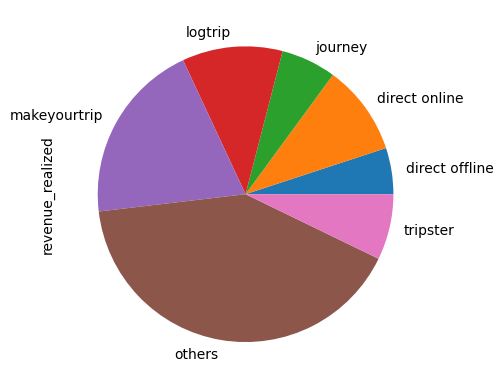

In [ ]:
hotels_data.groupby('booking_platform')['revenue_realized'].sum().plot(kind = 'pie')